# **Exploratory Data Analysis (EDA)**
(Necessary for ALL models)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/train.csv')

Overview and Cleaning

In [ ]:
df['label'] = df['label'].replace({0: 2, 2: 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.3+ KB


In [ ]:
df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,2
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,0
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,2
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,2
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [ ]:
df.shape

(12120, 6)

In [ ]:
df['label'].unique()

array([0, 2, 1])

In [ ]:
df.columns

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')

In [ ]:
print(df.isnull().sum())

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Language Distribution

In [ ]:
language_freq = df['language'].value_counts()

# Alternatively, to print each language on a separate line:
for language, count in language_freq.items():
    print(f"{language}: {count}")

English: 6870
Chinese: 411
Arabic: 401
French: 390
Swahili: 385
Urdu: 381
Vietnamese: 379
Russian: 376
Hindi: 374
Greek: 372
Thai: 371
Spanish: 366
Turkish: 351
German: 351
Bulgarian: 342


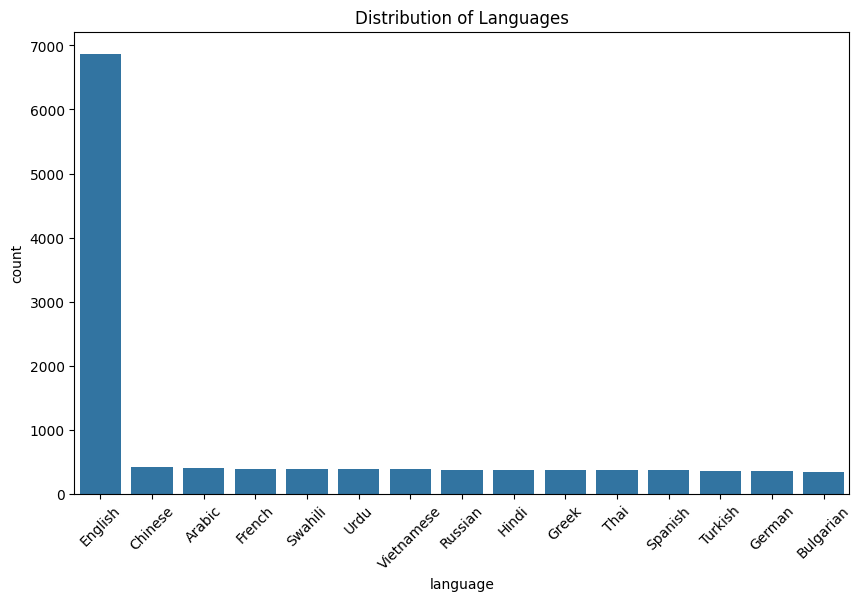

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='language', data=df, order=df['language'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Languages')
plt.show()

<ipython-input-13-b1a9657e5688>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='language', data=df, palette='viridis', order=df['language'].value_counts().index)


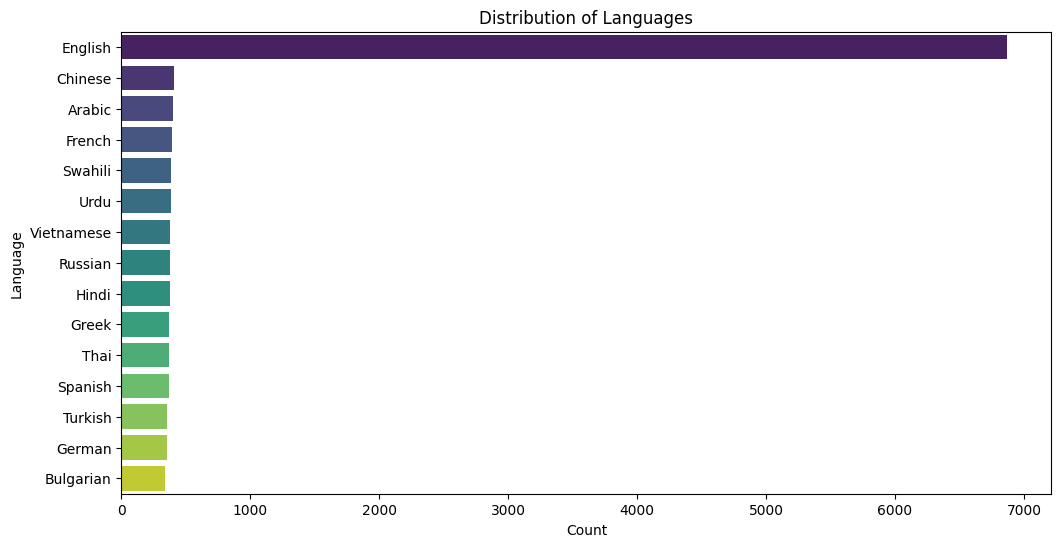

In [ ]:
# Plot language distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='language', data=df, palette='viridis', order=df['language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.savefig('language_distribution.png')
plt.show()
plt.close()


Text Length Analysis

In [ ]:
df['premise'].apply(len)

,premise
0,68
1,81
2,92
3,92
4,182
...,...
12115,247
12116,140
12117,69
12118,64


In [ ]:
df['hypothesis'].apply(len)

,hypothesis
0,81
1,58
2,37
3,50
4,47
...,...
12115,56
12116,80
12117,32
12118,44


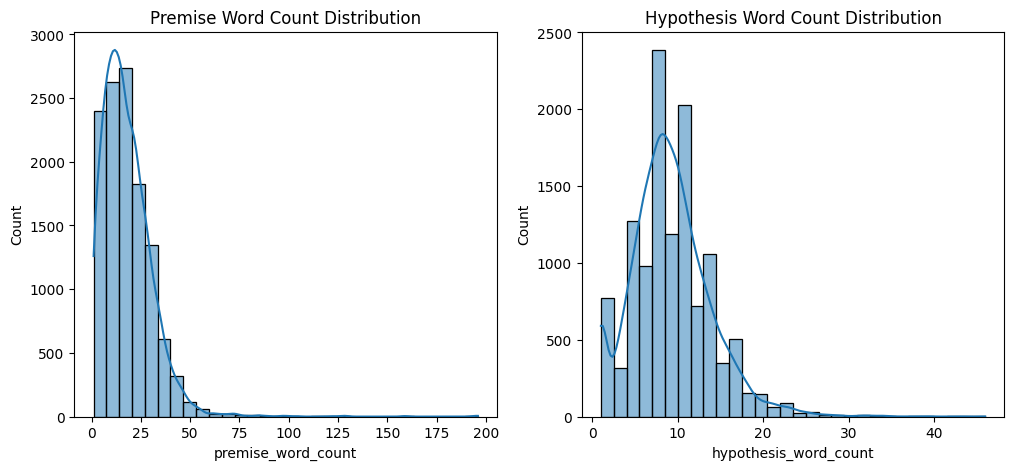

In [ ]:
# Calculate word and character lengths for premise and hypothesis
df['premise_word_count'] = df['premise'].apply(lambda x: len(str(x).split()))
df['hypothesis_word_count'] = df['hypothesis'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df['premise_word_count'], bins=30, kde=True)
plt.title('Premise Word Count Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['hypothesis_word_count'], bins=30, kde=True)
plt.title('Hypothesis Word Count Distribution')
plt.show()


Text(0.5, 1.0, 'Hypothesis Sentence Count Distribution')

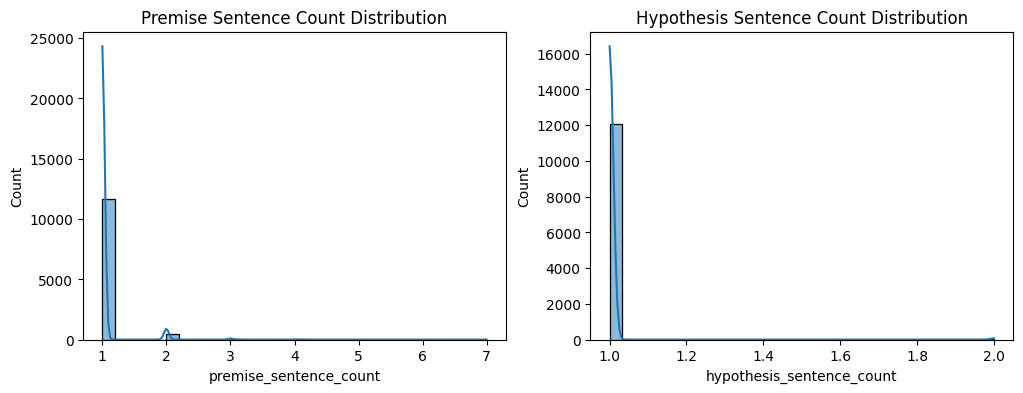

In [ ]:
# Calculate sentence counts using nltk's sent_tokenize
df['premise_sentence_count'] = df['premise'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
df['hypothesis_sentence_count'] = df['hypothesis'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
# Sentence Count Distribution
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(df['premise_sentence_count'], bins=30, kde=True)
plt.title('Premise Sentence Count Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['hypothesis_sentence_count'], bins=30, kde=True)
plt.title('Hypothesis Sentence Count Distribution')

Text(0.5, 1.0, 'Hypothesis Character Count Distribution')

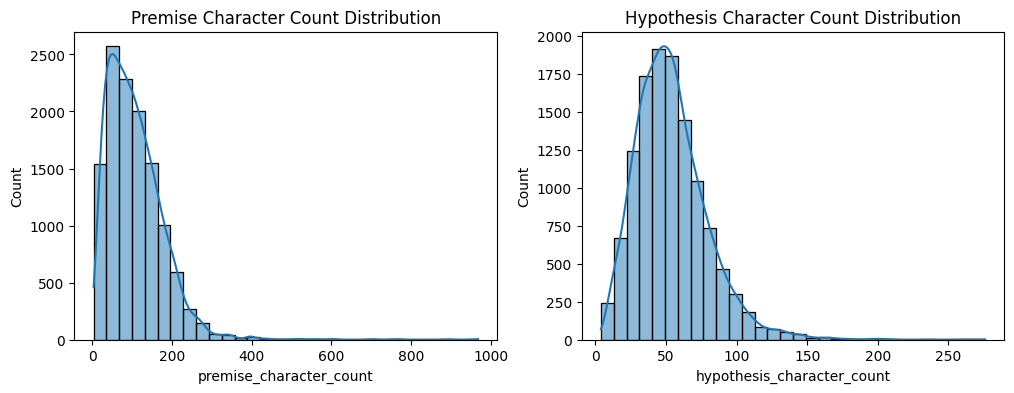

In [ ]:
# Calculate character counts
df['premise_character_count'] = df['premise'].apply(lambda x: len(str(x)))
df['hypothesis_character_count'] = df['hypothesis'].apply(lambda x: len(str(x)))
# Character Count Distribution
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(df['premise_character_count'], bins=30, kde=True)
plt.title('Premise Character Count Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['hypothesis_character_count'], bins=30, kde=True)
plt.title('Hypothesis Character Count Distribution')


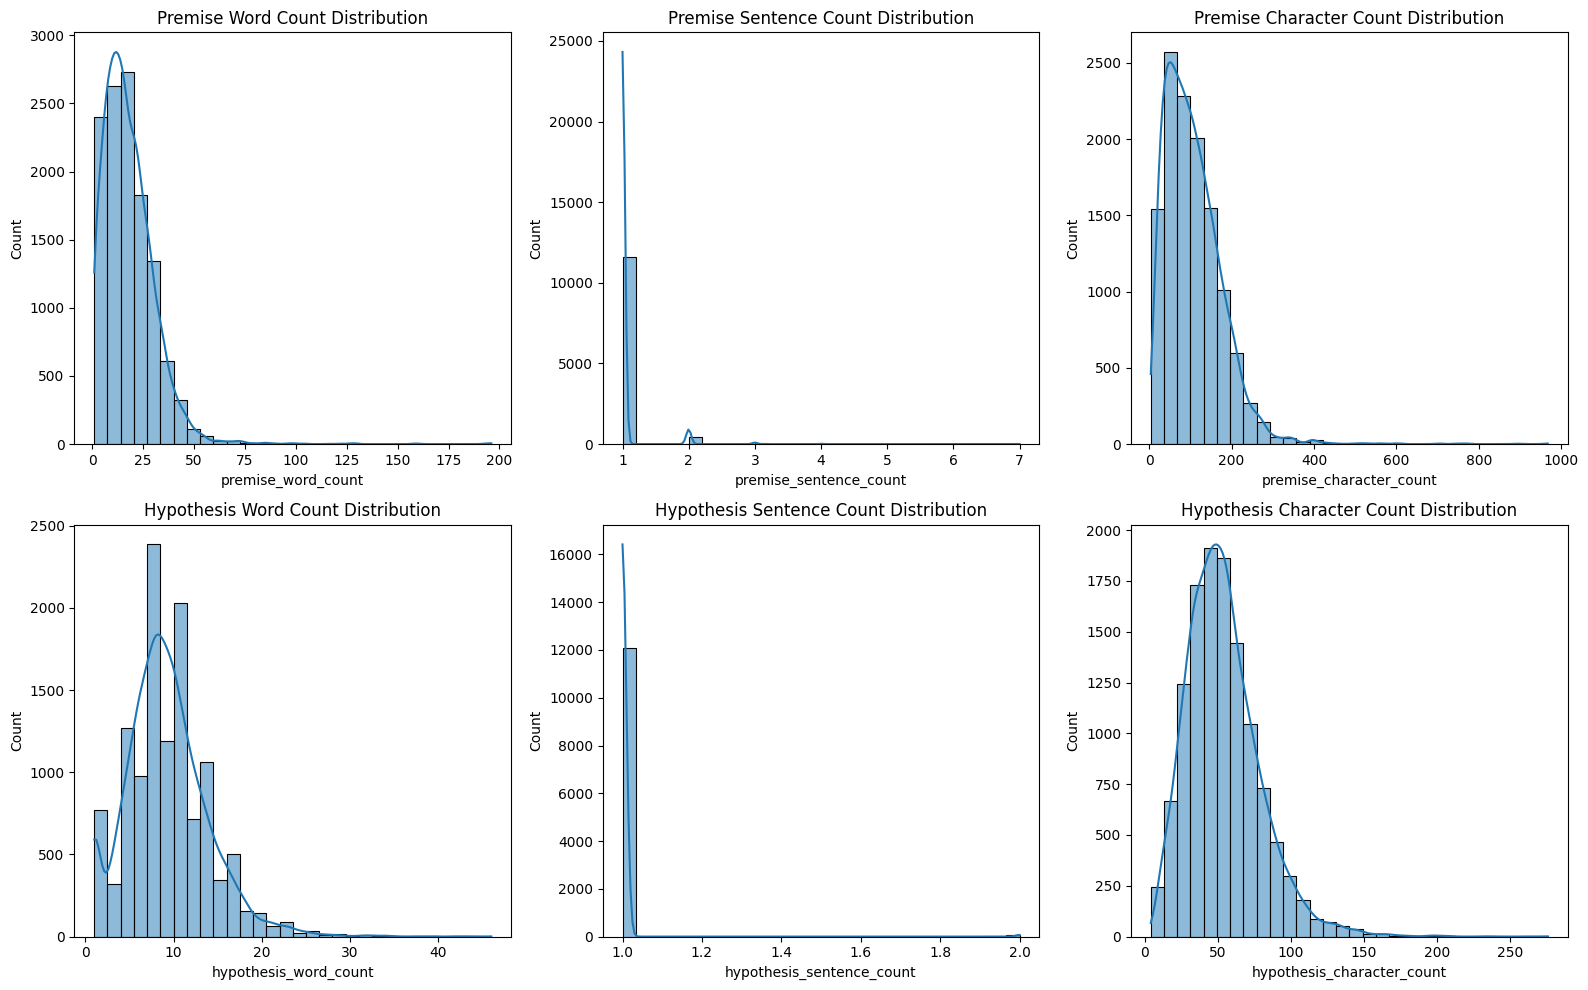

In [ ]:

# Calculate word counts
df['premise_word_count'] = df['premise'].apply(lambda x: len(str(x).split()))
df['hypothesis_word_count'] = df['hypothesis'].apply(lambda x: len(str(x).split()))

# Calculate sentence counts using nltk's sent_tokenize
df['premise_sentence_count'] = df['premise'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
df['hypothesis_sentence_count'] = df['hypothesis'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

# Calculate character counts
df['premise_character_count'] = df['premise'].apply(lambda x: len(str(x)))
df['hypothesis_character_count'] = df['hypothesis'].apply(lambda x: len(str(x)))

# Visualize the distributions using subplots
plt.figure(figsize=(16, 10))

# Word Count Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['premise_word_count'], bins=30, kde=True)
plt.title('Premise Word Count Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['hypothesis_word_count'], bins=30, kde=True)
plt.title('Hypothesis Word Count Distribution')

# Sentence Count Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['premise_sentence_count'], bins=30, kde=True)
plt.title('Premise Sentence Count Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['hypothesis_sentence_count'], bins=30, kde=True)
plt.title('Hypothesis Sentence Count Distribution')

# Character Count Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['premise_character_count'], bins=30, kde=True)
plt.title('Premise Character Count Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['hypothesis_character_count'], bins=30, kde=True)
plt.title('Hypothesis Character Count Distribution')

plt.tight_layout()
plt.show()


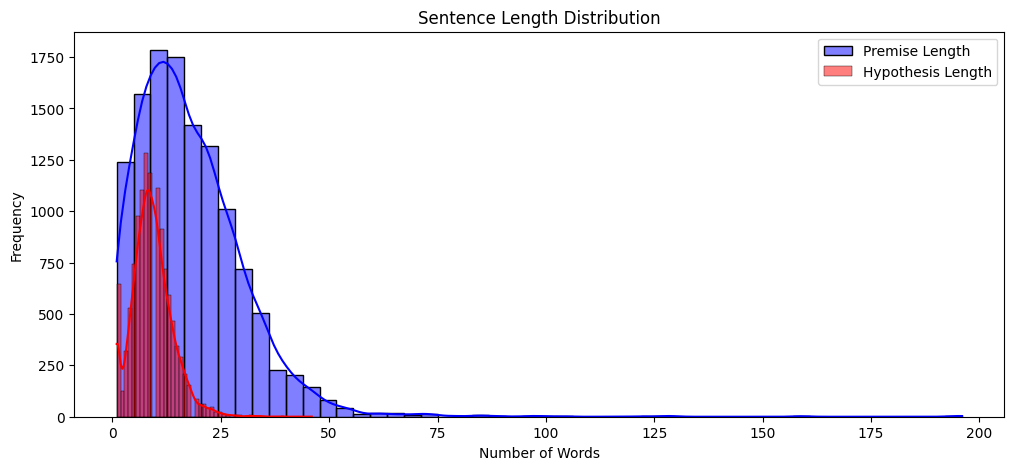

In [ ]:
# Plot sentence length distributions
plt.figure(figsize=(12,5))
sns.histplot(df['premise_word_count'], bins=50, kde=True, color='blue', label='Premise Length')
sns.histplot(df['hypothesis_word_count'], bins=50, kde=True, color='red', label='Hypothesis Length')
plt.legend()
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


#**Distribution of Contradiction, Entailment, and Neutral labels.**

In [ ]:
df['label'].value_counts()

,count
label,
0,4176
2,4064
1,3880


<ipython-input-26-ba3a8d7fe693>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


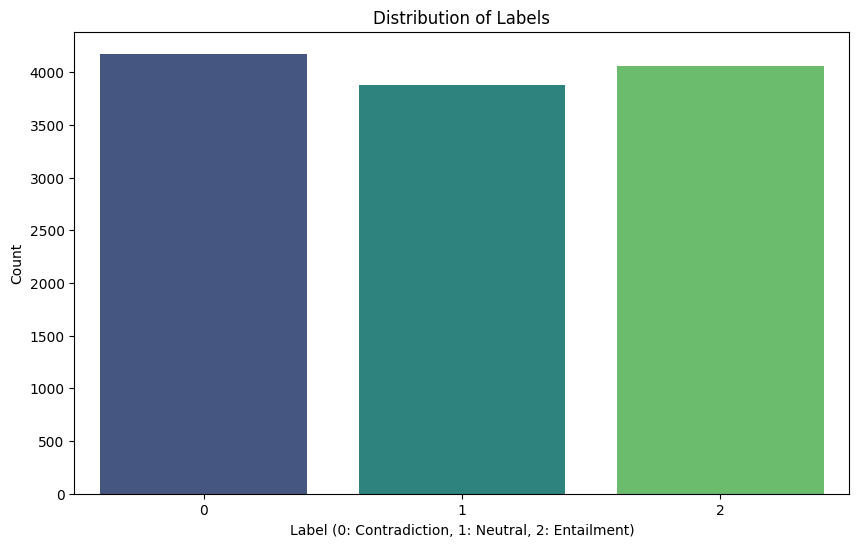

In [ ]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label (0: Contradiction, 1: Neutral, 2: Entailment)')
plt.ylabel('Count')
plt.savefig('label_distribution.png')
plt.show()
plt.close()



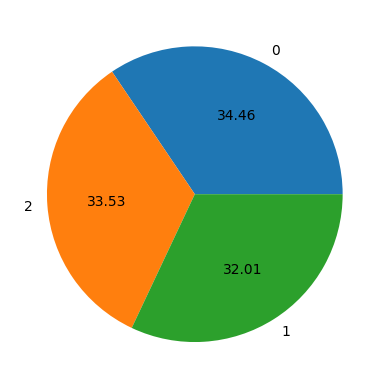

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['0','2','1'],autopct="%0.2f")
plt.show()

# **Word Frequency or Common Words**

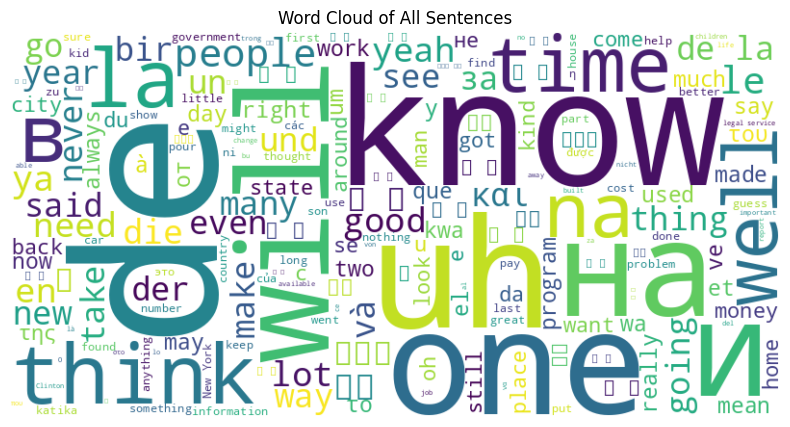

In [ ]:
from wordcloud import WordCloud

# Combine all premises and hypotheses
text = " ".join(df['premise'].tolist() + df['hypothesis'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Sentences")
plt.show()


In French Language Word Frequency or Common Words

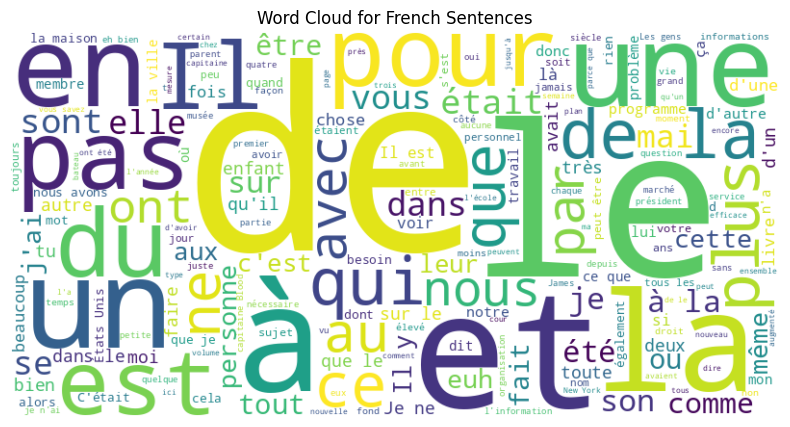

In [ ]:
# Filter the dataset for French texts
french_text = " ".join(
    df[df['language'] == 'French']['premise'].tolist() +
    df[df['language'] == 'French']['hypothesis'].tolist()
)

# Generate and display the word cloud
wordcloud_french = WordCloud(width=800, height=400, background_color='white').generate(french_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_french, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for French Sentences")
plt.show()


In Chinese Language Word Frequency or Common Words

--2025-02-26 22:29:45--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKsc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.194.207, 173.194.206.207, 172.217.214.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121063622 (115M) [application/zip]
Saving to: ‘NotoSansCJKsc-hinted.zip’

NotoSansCJKsc-hinte 100%[===================>] 115.46M  99.2MB/s    in 1.2s    

2025-02-26 22:29:46 (99.2 MB/s) - ‘NotoSansCJKsc-hinted.zip’ saved [121063622/121063622]

Archive:  NotoSansCJKsc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKsc-Black.otf  
  inflating: NotoSansCJKsc-Bold.otf  
  inflating: NotoSansCJKsc-DemiLight.otf  
  inflating: NotoSansCJKsc-Light.otf  
  inflating: NotoSansCJKsc-Medium.otf  
  inflating: NotoSansCJKsc-Regular.otf  
  inflating: 

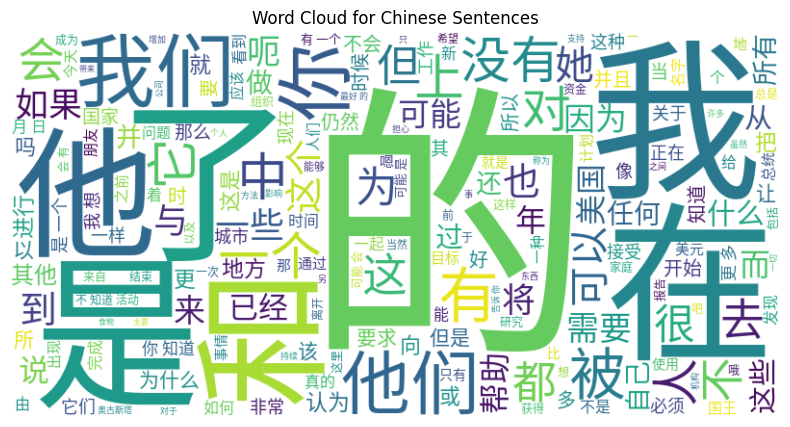

In [ ]:
!pip install wordcloud
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the dataset for Chinese texts
chinese_text_list = df[df['language'] == 'Chinese']['premise'].tolist() + \
                    df[df['language'] == 'Chinese']['hypothesis'].tolist()

# Segment the text using jieba
chinese_text_segmented = " ".join([" ".join(jieba.cut(text)) for text in chinese_text_list])

# Download a Chinese font (SimHei) and provide the correct path
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKsc-hinted.zip
!unzip NotoSansCJKsc-hinted.zip
font_path = 'NotoSansCJKsc-Regular.otf'  # Path to the downloaded font

# Generate the word cloud with the correct font path
wordcloud_chinese = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path  # Use the downloaded font
).generate(chinese_text_segmented)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_chinese, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Chinese Sentences")
plt.show()

In [ ]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 68.9 MB/s eta 0:00:00


Word Cloud of All Sentences (All Languages Combined)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 3.842 seconds.
DEBUG:jieba:Loading model cost 3.842 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


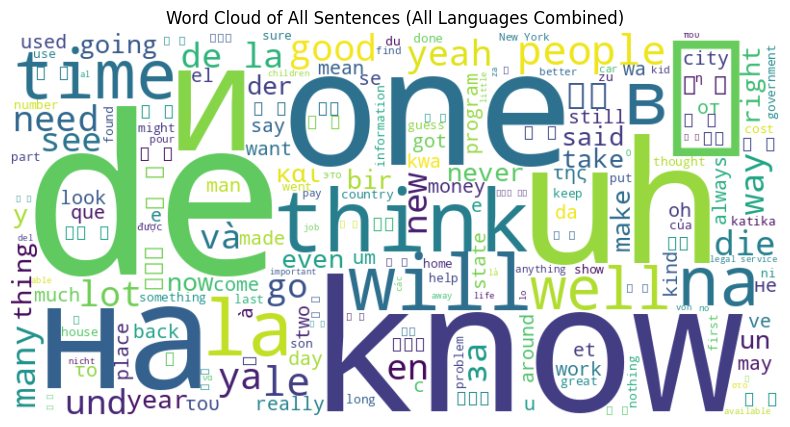

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba  # For Chinese segmentation
from pythainlp.tokenize import word_tokenize as thai_word_tokenize  # For Thai segmentation
df = pd.read_csv('/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/train.csv')

def process_text(row):
    """
    Process the text for each row based on its language.
    Combines the premise and hypothesis, then applies segmentation if needed.
    """
    # Combine the two text columns
    text = str(row['premise']) + " " + str(row['hypothesis'])
    lang = row['language'].lower()

    if lang == 'chinese':
        tokens = jieba.cut(text)
        return " ".join(tokens)
    elif lang == 'thai':
        tokens = thai_word_tokenize(text)
        return " ".join(tokens)
    else:
        return text

processed_text = " ".join(df.apply(process_text, axis=1))
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
).generate(processed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Sentences (All Languages Combined)")
plt.show()

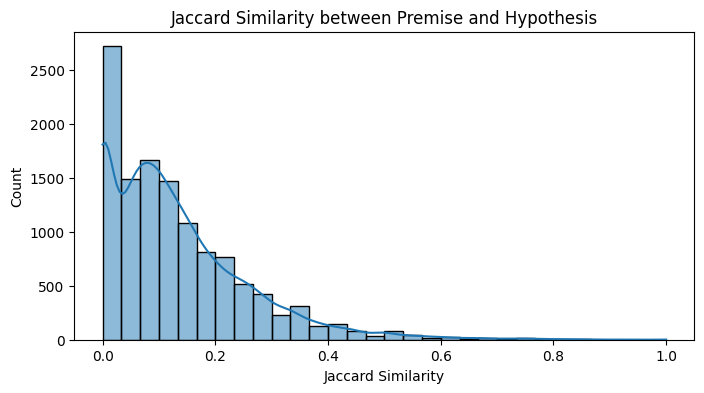

In [ ]:
def jaccard_similarity(s1, s2):
    a = set(s1.split())
    b = set(s2.split())
    intersection = a.intersection(b)
    union = a.union(b)
    return len(intersection) / len(union) if union else 0

df['jaccard_similarity'] = df.apply(lambda row: jaccard_similarity(row['premise'], row['hypothesis']), axis=1)

plt.figure(figsize=(8,4))
sns.histplot(df['jaccard_similarity'], bins=30, kde=True)
plt.title('Jaccard Similarity between Premise and Hypothesis')
plt.xlabel('Jaccard Similarity')
plt.show()


Top 20 Bigrams in Premises:
 [('don know', 82), ('new york', 73), ('کے لئے', 65), ('uh huh', 58), ('legal services', 58), ('طور پر', 48), ('um hum', 44), ('yeah yeah', 37), ('ہے کہ', 35), ('có thể', 34), ('да се', 32), ('united states', 32), ('york times', 31), ('là một', 31), ('uh uh', 31), ('en el', 31), ('yeah uh', 30), ('don think', 30), ('uh know', 30), ('years ago', 29)]


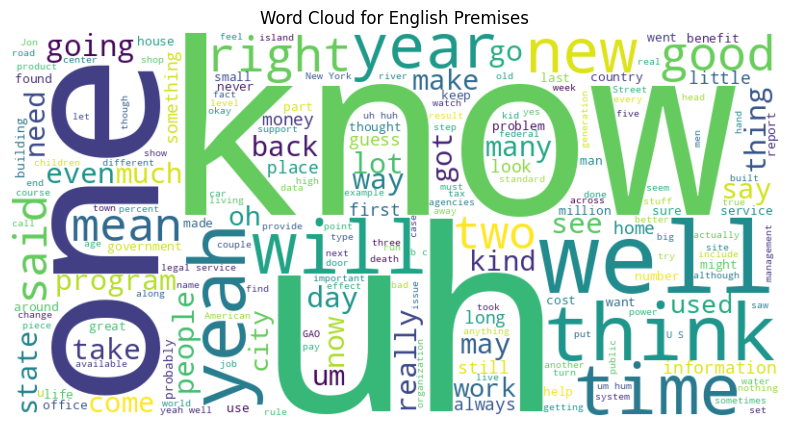

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Example for bigrams on the premise column
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['premise'])
sum_words = X.toarray().sum(axis=0)
bigrams_freq = {word: sum_words[idx] for word, idx in vectorizer.vocabulary_.items()}
common_bigrams = sorted(bigrams_freq.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top 20 Bigrams in Premises:\n", common_bigrams)

# Create a word cloud for the English texts (or filter by language as needed)
text = " ".join(df[df['language'] == 'English']['premise'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for English Premises")
plt.show()


# **Text Preprocessing**

## **1. Apply Tokenization**
## **2. Lowercasing: Convert text to lowercase.**
## **3. Remove stop words, special characters, and punctuation.**
## 4. Stemming/Lemmatization: Normalize words to their root form. **bold text**


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer

In [ ]:
# Download required resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Define a mapping for NLTK-supported languages (for stopwords and SnowballStemmer)
# NLTK’s stopwords corpus supports these languages:
nltk_stopwords_map = {
    'en': 'english',
    'fr': 'french',
    'de': 'german',
    'es': 'spanish',
    'ru': 'russian',
    'ar': 'arabic'
    # Add more if available and supported
}

In [ ]:
# Define which language abbreviations we have support for using SnowballStemmer
snowball_supported_languages = {'en', 'fr', 'de', 'es', 'ru', 'ar'}

In [ ]:
def preprocess_text(text, lang_abv):
    # Ensure the text is a string and lowercase it
    text = str(text).lower()

    # Special handling for Chinese (zh) as an example – use jieba if installed
    if lang_abv == 'zh':
        try:
            import jieba
            tokens = list(jieba.cut(text))
        except ImportError:
            print("jieba not installed; falling back to simple split for Chinese")
            tokens = text.split()
    else:
        # Tokenization: split by word boundaries using regex
        tokens = re.findall(r'\b\w+\b', text)

    # Remove stopwords if available for the language
    if lang_abv in nltk_stopwords_map:
        stops = set(stopwords.words(nltk_stopwords_map[lang_abv]))
        tokens = [token for token in tokens if token not in stops]

    # Stemming: use SnowballStemmer if supported; otherwise (for unsupported languages) skip stemming
    if lang_abv in snowball_supported_languages:
        # Use the language name from our mapping for the stemmer
        stemmer = SnowballStemmer(nltk_stopwords_map[lang_abv])
        tokens = [stemmer.stem(token) for token in tokens]
    # (If you prefer lemmatization for English, you could substitute using WordNetLemmatizer)

    return tokens

In [ ]:
df['premise_tokens'] = df.apply(lambda row: preprocess_text(row['premise'], row['lang_abv']), axis=1)
df['hypothesis_tokens'] = df.apply(lambda row: preprocess_text(row['hypothesis'], row['lang_abv']), axis=1)

# Print a sample of the resulting tokens for verification
print(df[['id', 'premise_tokens', 'hypothesis_tokens']].head())

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.620 seconds.
DEBUG:jieba:Loading model cost 0.620 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


           id                                     premise_tokens  \
0  5130fd2cb5           [comment, consid, formul, interim, rule]   
1  5b72532a0b    [issu, wrestl, practic, group, law, firm, said]   
2  3931fbe82a  [petit, chos, comm, cel, là, font, différent, ...   
3  5622f0c60b  [know, realli, defend, like, somebodi, grown, ...   
4  86aaa48b45  [ในการเล, นบทบาทสมม, ต, ก, เช, นก, น, โอกาสท, ...   

                                   hypothesis_tokens  
0  [rule, develop, interim, put, togeth, comment,...  
1               [practic, group, permit, work, issu]  
2                     [essai, accompl, quelqu, chos]  
3                                      [defend, age]  
4  [เด, กสามารถเห, นได, ว, าชาต, พ, นธ, แตกต, างก...  


In [ ]:
df.head()

,id,premise,hypothesis,lang_abv,language,label,premise_tokens,hypothesis_tokens
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,2,"[comment, consid, formul, interim, rule]","[rule, develop, interim, put, togeth, comment,..."
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,0,"[issu, wrestl, practic, group, law, firm, said]","[practic, group, permit, work, issu]"
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,2,"[petit, chos, comm, cel, là, font, différent, ...","[essai, accompl, quelqu, chos]"
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,2,"[know, realli, defend, like, somebodi, grown, ...","[defend, age]"
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,"[ในการเล, นบทบาทสมม, ต, ก, เช, นก, น, โอกาสท, ...","[เด, กสามารถเห, นได, ว, าชาต, พ, นธ, แตกต, างก..."


## **TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# If you already have a preprocessed clean text column, you can use it.
# For demonstration, we join token lists (assuming you have already tokenized & cleaned the text)
df['premise_clean'] = df['premise_tokens'].apply(lambda tokens: " ".join(tokens))
df['hypothesis_clean'] = df['hypothesis_tokens'].apply(lambda tokens: " ".join(tokens))

# Create a TF-IDF Vectorizer (limiting features for efficiency)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Convert text into TF-IDF vectors for premise and hypothesis separately:
tfidf_premise = tfidf_vectorizer.fit_transform(df['premise_clean'])
tfidf_hypothesis = tfidf_vectorizer.fit_transform(df['hypothesis_clean'])

print("TF-IDF shape for premise:", tfidf_premise.shape)


TF-IDF shape for premise: (12120, 5000)


In [ ]:
df.head()

,id,premise,hypothesis,lang_abv,language,label,premise_tokens,hypothesis_tokens,premise_clean,hypothesis_clean
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,2,"[comment, consid, formul, interim, rule]","[rule, develop, interim, put, togeth, comment,...",comment consid formul interim rule,rule develop interim put togeth comment mind
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,0,"[issu, wrestl, practic, group, law, firm, said]","[practic, group, permit, work, issu]",issu wrestl practic group law firm said,practic group permit work issu
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,2,"[petit, chos, comm, cel, là, font, différent, ...","[essai, accompl, quelqu, chos]",petit chos comm cel là font différent énorm es...,essai accompl quelqu chos
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,2,"[know, realli, defend, like, somebodi, grown, ...","[defend, age]",know realli defend like somebodi grown uh say ...,defend age
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,"[ในการเล, นบทบาทสมม, ต, ก, เช, นก, น, โอกาสท, ...","[เด, กสามารถเห, นได, ว, าชาต, พ, นธ, แตกต, างก...",ในการเล นบทบาทสมม ต ก เช นก น โอกาสท จะได แสดง...,เด กสามารถเห นได ว าชาต พ นธ แตกต างก นอย างไร


## **Word2Vec Embeddings**

In [ ]:
import numpy as np
from gensim.models import Word2Vec

# Combine tokens from both columns for training the Word2Vec model:
all_tokens = df['premise_tokens'].tolist() + df['hypothesis_tokens'].tolist()

# Train a Word2Vec model (vector_size=100 is an example)
w2v_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for a sentence:
def average_word2vec(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words are found
        return np.zeros(model.vector_size)

# Compute average embeddings for each sentence:
df['premise_w2v'] = df['premise_tokens'].apply(lambda tokens: average_word2vec(tokens, w2v_model))
df['hypothesis_w2v'] = df['hypothesis_tokens'].apply(lambda tokens: average_word2vec(tokens, w2v_model))

print("Example Word2Vec embedding for premise:", df['premise_w2v'].iloc[0])


Example Word2Vec embedding for premise: [-0.1768134   0.22649345  0.18591547  0.06337267  0.06977303 -0.27607614
  0.14978509  0.5674573  -0.27906352 -0.22609515 -0.13471875 -0.2830701
 -0.08715481  0.0557859   0.1181988  -0.18878093  0.15754814 -0.14935346
 -0.15444753 -0.567356    0.07356469  0.018832    0.16066298 -0.09012981
 -0.09506237 -0.00769239 -0.2088192   0.0366969  -0.2633232   0.1294522
  0.21825008 -0.0397991   0.06157792 -0.33919406 -0.0412894   0.15034264
  0.13398826 -0.14479552 -0.04726704 -0.2429065   0.1474953  -0.2829058
 -0.25050247  0.07430454  0.19936095 -0.15373103 -0.1775812  -0.05093933
  0.10815442  0.22198169  0.1379287  -0.10370193 -0.0679477  -0.03269307
 -0.10252539  0.01439249  0.17161612  0.00165792 -0.19396722  0.12584738
  0.08857314  0.04059344  0.029106   -0.08262419 -0.25004297  0.2112426
  0.10923915  0.19648372 -0.23581067  0.16496778  0.06438847  0.2144531
  0.277139   -0.08891268  0.21020718  0.11903511  0.18988319  0.00439093
 -0.05074022 -0.

In [ ]:
df.head()

,id,premise,hypothesis,lang_abv,language,label,premise_tokens,hypothesis_tokens,premise_clean,hypothesis_clean,premise_w2v,hypothesis_w2v
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,2,"[comment, consid, formul, interim, rule]","[rule, develop, interim, put, togeth, comment,...",comment consid formul interim rule,rule develop interim put togeth comment mind,"[-0.16548078, 0.20390634, 0.2542521, 0.0627731...","[-0.16041784, 0.27156976, 0.30382422, 0.078737..."
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,0,"[issu, wrestl, practic, group, law, firm, said]","[practic, group, permit, work, issu]",issu wrestl practic group law firm said,practic group permit work issu,"[-0.18088317, 0.32050928, 0.36132222, 0.096633...","[-0.18572035, 0.38690454, 0.4081846, 0.1114445..."
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,2,"[petit, chos, comm, cel, là, font, différent, ...","[essai, accompl, quelqu, chos]",petit chos comm cel là font différent énorm es...,essai accompl quelqu chos,"[-0.25409478, 0.14914224, 0.26099306, 0.057172...","[-0.10628651, 0.07529441, 0.130502, 0.03083161..."
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,2,"[know, realli, defend, like, somebodi, grown, ...","[defend, age]",know realli defend like somebodi grown uh say ...,defend age,"[-0.07134678, 0.8441934, 0.6935036, 0.24390021...","[-0.14447127, 0.23276158, 0.27075016, 0.070764..."
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,"[ในการเล, นบทบาทสมม, ต, ก, เช, นก, น, โอกาสท, ...","[เด, กสามารถเห, นได, ว, าชาต, พ, นธ, แตกต, างก...",ในการเล นบทบาทสมม ต ก เช นก น โอกาสท จะได แสดง...,เด กสามารถเห นได ว าชาต พ นธ แตกต างก นอย างไร,"[-0.2534328, 0.16766202, 0.29849565, 0.0629578...","[-0.21075676, 0.1400078, 0.24799962, 0.0533143..."


## **Transformer Embeddings (BERT, XLM-R, etc.)**

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a multilingual transformer model
transformer_model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

# Compute embeddings for each sentence in the original text columns
df['premise_transformer'] = df['premise'].apply(lambda text: transformer_model.encode(text))
df['hypothesis_transformer'] = df['hypothesis'].apply(lambda text: transformer_model.encode(text))

print("Example Transformer embedding for premise:", df['premise_transformer'].iloc[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense%2Fconfig.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

Example Transformer embedding for premise: [-3.09965182e-02  1.66403577e-02 -2.93361880e-02  9.15058106e-02
 -1.26484245e-01 -3.23891044e-02 -6.73588961e-02  6.81457520e-02
 -1.10892005e-01 -2.41628196e-03 -6.87070191e-02 -6.39054924e-02
 -4.74063307e-02 -3.74475159e-02  2.85543203e-02 -1.91956349e-02
  7.25712162e-03  5.65043360e-04  7.90197216e-03 -5.70387347e-03
  4.06521037e-02 -8.18187371e-03  8.57943445e-02  2.49488670e-02
  2.69536395e-04 -6.09453022e-02  4.09399979e-02  6.24052845e-02
 -1.30537068e-02 -1.01009076e-02 -7.74026439e-02  7.98490047e-02
  4.12331857e-02  3.91532741e-02  2.25392468e-02  8.45720395e-02
 -1.37865860e-02  9.74462077e-04 -1.31682325e-02  2.57198624e-02
  4.24281545e-02  4.77159536e-03 -7.04827812e-03 -4.08068076e-02
  5.49824387e-02 -8.42673704e-02  4.36221957e-02 -1.17773330e-02
  3.23911794e-02  7.01565202e-03  8.49089697e-02  6.20341897e-02
  6.75524697e-02  3.26765794e-03 -1.20289922e-01  4.43923334e-03
  5.08380495e-03 -3.02876290e-02  1.36669874e-0

In [ ]:
df.head(1)

,id,premise,hypothesis,lang_abv,language,label,premise_tokens,hypothesis_tokens,premise_clean,hypothesis_clean,premise_w2v,hypothesis_w2v,premise_transformer,hypothesis_transformer
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,2,"[comment, consid, formul, interim, rule]","[rule, develop, interim, put, togeth, comment,...",comment consid formul interim rule,rule develop interim put togeth comment mind,"[-0.15017928, 0.22128704, 0.25863528, 0.048263...","[-0.12486919, 0.28551096, 0.29517147, 0.059322...","[-0.030996509, 0.016640356, -0.029336147, 0.09...","[-0.019010749, -0.019704752, -0.018179426, 0.0..."


# **Baseline Model: Random Forest, Decision trees, XGB**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# **Random Forest**

### **Random Forest Using TF-IDF**

In [ ]:
df['premise_clean'] = df['premise_tokens'].apply(lambda tokens: " ".join(tokens))
df['hypothesis_clean'] = df['hypothesis_tokens'].apply(lambda tokens: " ".join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['premise_clean'])

y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.21204620462046206
              precision    recall  f1-score   support

           0       0.19      0.20      0.19       800
           1       0.21      0.19      0.20       773
           2       0.23      0.25      0.24       851

    accuracy                           0.21      2424
   macro avg       0.21      0.21      0.21      2424
weighted avg       0.21      0.21      0.21      2424



### **Random Forest Using Using Word2Vec**

In [ ]:
X_w2v = np.hstack((
    np.vstack(df['premise_w2v']),
    np.vstack(df['hypothesis_w2v'])
))

# Proceed with train_test_split and model training as before:
X_train, X_test, y_train, y_test = train_test_split(X_w2v, df['label'], test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Word2Vec based Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Word2Vec based Accuracy: 0.32466996699669964
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       800
           1       0.33      0.32      0.32       773
           2       0.34      0.32      0.33       851

    accuracy                           0.32      2424
   macro avg       0.33      0.32      0.32      2424
weighted avg       0.33      0.32      0.32      2424



### **Random Forest Using Transformer Embeddings**

In [ ]:
X_transformer = np.hstack((
    np.vstack(df['premise_transformer']),
    np.vstack(df['hypothesis_transformer'])
))

# Train and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_transformer, df['label'], test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Transformer based Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Transformer based Accuracy: 0.4397689768976898
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       800
           1       0.39      0.38      0.38       773
           2       0.41      0.46      0.43       851

    accuracy                           0.44      2424
   macro avg       0.44      0.44      0.44      2424
weighted avg       0.44      0.44      0.44      2424



Confusion Matrix:
 [[385 170 245]
 [170 292 311]
 [180 282 389]]


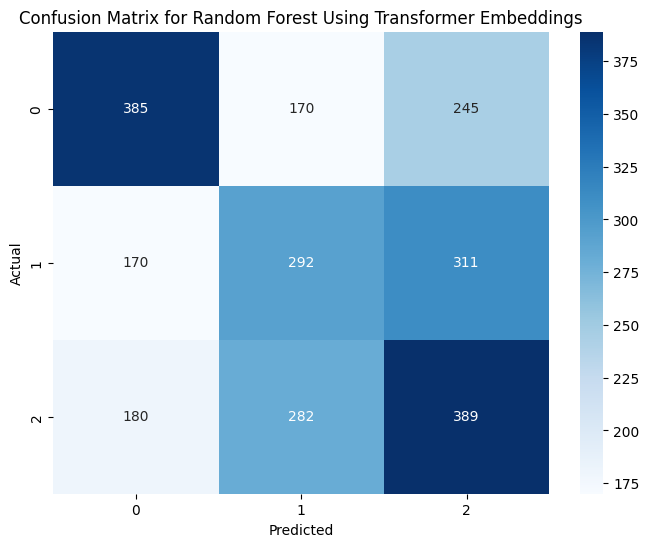

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Using Transformer Embeddings")
plt.show()


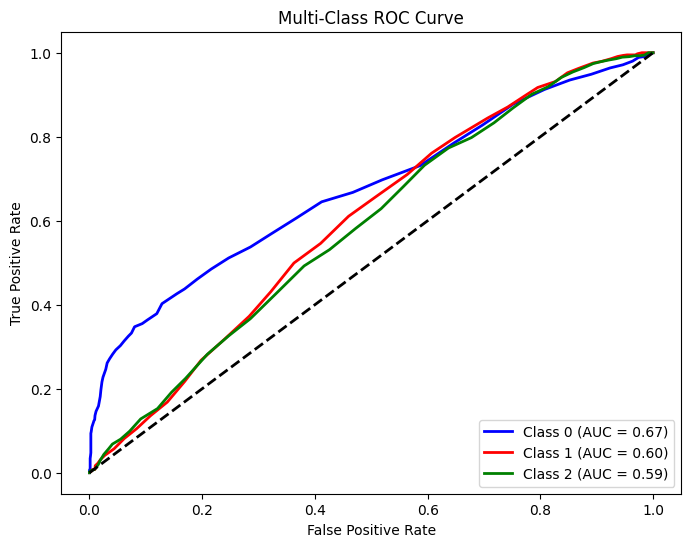

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_prob = rf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot reference diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()


# **Decision trees**

### **Decision trees Using TF-IDF**

In [ ]:
df['premise_clean'] = df['premise_tokens'].apply(lambda tokens: " ".join(tokens))

# Initialize and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['premise_clean'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.2079207920792079

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.22      0.20       800
           1       0.20      0.19      0.19       773
           2       0.26      0.21      0.23       851

    accuracy                           0.21      2424
   macro avg       0.21      0.21      0.21      2424
weighted avg       0.21      0.21      0.21      2424



### **Decision trees Using Word2Vec**

In [ ]:
X_w2v = np.hstack((
    np.vstack(df['premise_w2v']),
    np.vstack(df['hypothesis_w2v'])
))

y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree
dt_w2v = DecisionTreeClassifier(random_state=42)
dt_w2v.fit(X_train, y_train)
y_pred_w2v = dt_w2v.predict(X_test)

print("Word2Vec based Accuracy:", accuracy_score(y_test, y_pred_w2v))
print("\nWord2Vec based Classification Report:\n", classification_report(y_test, y_pred_w2v))


Word2Vec based Accuracy: 0.3259075907590759

Word2Vec based Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.36      0.34       800
           1       0.33      0.32      0.33       773
           2       0.32      0.30      0.31       851

    accuracy                           0.33      2424
   macro avg       0.33      0.33      0.33      2424
weighted avg       0.33      0.33      0.33      2424



### **Decision trees Using Transformer Embeddings**

In [ ]:
X_transformer = np.hstack((
    np.vstack(df['premise_transformer']),
    np.vstack(df['hypothesis_transformer'])
))

y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformer, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree
dt_transformer = DecisionTreeClassifier(random_state=42)
dt_transformer.fit(X_train, y_train)
y_pred_transformer = dt_transformer.predict(X_test)

print("Transformer based Accuracy:", accuracy_score(y_test, y_pred_transformer))
print("\nTransformer based Classification Report:\n", classification_report(y_test, y_pred_transformer))


Transformer based Accuracy: 0.40264026402640263

Transformer based Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.46      0.46       800
           1       0.34      0.36      0.35       773
           2       0.40      0.39      0.39       851

    accuracy                           0.40      2424
   macro avg       0.40      0.40      0.40      2424
weighted avg       0.40      0.40      0.40      2424



Confusion Matrix:
 [[385 170 245]
 [170 292 311]
 [180 282 389]]


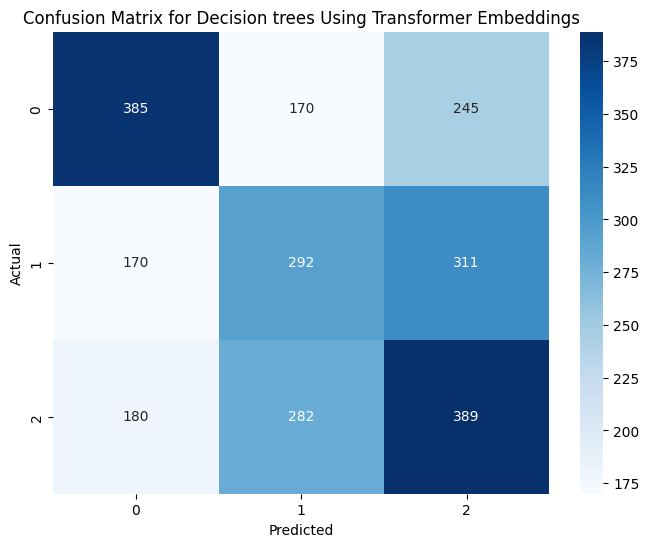

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision trees Using Transformer Embeddings")
plt.show()


# **XGBoost**

### **XGBoost Using TF-IDF**

In [ ]:
df['premise_clean'] = df['premise_tokens'].apply(lambda tokens: " ".join(tokens))


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['premise_clean'])

y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:58:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.27186468646864687

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.15      0.18       800
           1       0.22      0.12      0.15       773
           2       0.31      0.53      0.39       851

    accuracy                           0.27      2424
   macro avg       0.25      0.26      0.24      2424
weighted avg       0.25      0.27      0.24      2424



### **XGBoost Using Word2Vec**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:47:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Word2Vec) Accuracy: 0.3415841584158416

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.34      0.33       800
           1       0.36      0.34      0.35       773
           2       0.35      0.34      0.34       851

    accuracy                           0.34      2424
   macro avg       0.34      0.34      0.34      2424
weighted avg       0.34      0.34      0.34      2424

Confusion Matrix:
 [[272 237 291]
 [250 264 259]
 [317 242 292]]


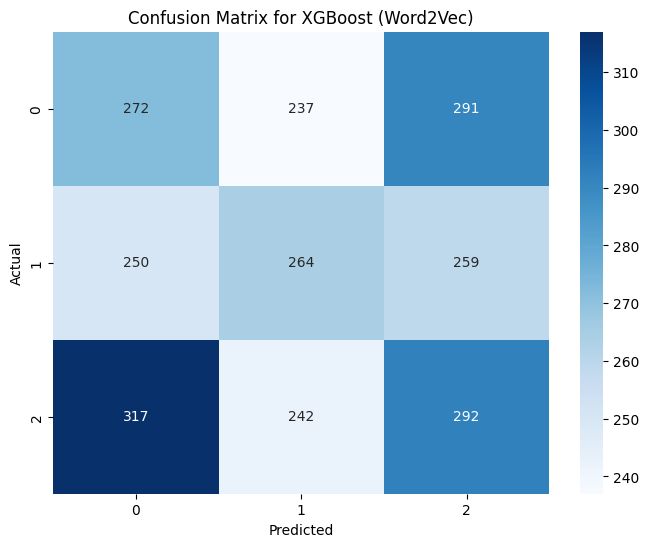

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the Word2Vec features
X_w2v = np.hstack((
    np.vstack(df['premise_w2v']),
    np.vstack(df['hypothesis_w2v'])
))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_w2v, df['label'], test_size=0.2, random_state=42)

# Initialize and train XGBoost as before
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42,
                              use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Print accuracy and classification report
print("XGBoost (Word2Vec) Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost (Word2Vec)")
plt.show()


# **Ensemble Model (Random Forest, Decision trees, XGB)**

In [ ]:
df['premise_clean'] = df['premise_tokens'].apply(lambda tokens: " ".join(tokens))

# Initialize and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['premise_clean'])
y = df['label']  # Ensure this column contains your labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42,
                            use_label_encoder=False, eval_metric='logloss')

# Combine classifiers using VotingClassifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('xgb', xgb_clf)],
    voting='hard'
)

# Train the Voting Ensemble on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Ensemble Accuracy: 0.21204620462046206

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.22      0.20       800
           1       0.20      0.16      0.18       773
           2       0.24      0.26      0.25       851

    accuracy                           0.21      2424
   macro avg       0.21      0.21      0.21      2424
weighted avg       0.21      0.21      0.21      2424



Confusion Matrix:
 [[173 278 349]
 [325 122 326]
 [426 206 219]]


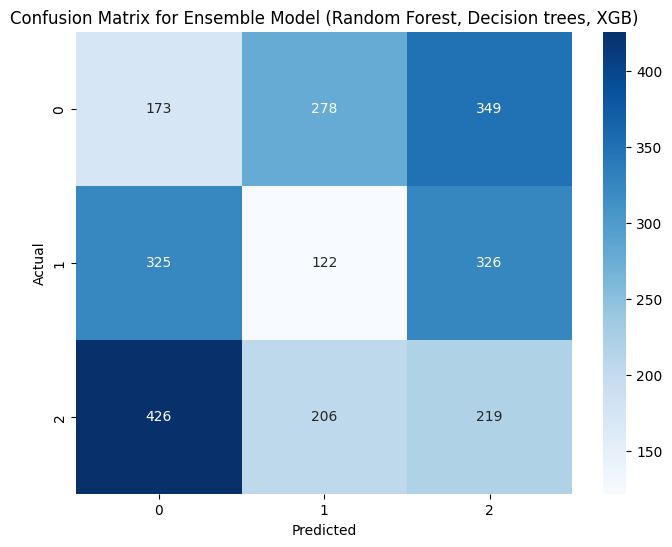

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Ensemble Model (Random Forest, Decision trees, XGB)")
plt.show()


# **Custom Artificial Neural Network (ANN)**

TensorFlow is using GPU
Data Shape: (12120, 6)
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-là font une di...   
3  5622f0c60b  you know they can't really defend themselves l...   
4  86aaa48b45  ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...   

                                          hypothesis lang_abv language  label  
0  The rules developed in the interim were put to...       en  English      2  
1  Practice groups are not permitted to work on t...       en  English      0  
2              J'essayais d'accomplir quelque chose.       fr   French      2  
3  They can't defend themselves because of their ...       en  English      2  
4    เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร       th     Thai      1  
Train samples: 9688
Eval samples: 2432


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               196864    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 230147 (899.01 KB)
Trainable params: 230147 (899.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
    5

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


605/606 [============================>.] - ETA: 0s - loss: 1.1688 - accuracy: 0.3733
Epoch 2: val_accuracy improved from 0.39268 to 0.42722, saving model to /content/drive/MyDrive/project/SM Technology Task/best_ann_model_tf.h5
606/606 [==============================] - 210s 69ms/step - loss: 1.1685 - accuracy: 0.3736 - val_loss: 1.0614 - val_accuracy: 0.4272
Epoch 3/10
593/606 [============================>.] - ETA: 0s - loss: 1.1323 - accuracy: 0.3940
Epoch 3: val_accuracy improved from 0.42722 to 0.44655, saving model to /content/drive/MyDrive/project/SM Technology Task/best_ann_model_tf.h5
606/606 [==============================] - 162s 52ms/step - loss: 1.1304 - accuracy: 0.3950 - val_loss: 1.0456 - val_accuracy: 0.4465
Epoch 4/10
606/606 [==============================] - ETA: 0s - loss: 1.1034 - accuracy: 0.4047
Epoch 4: val_accuracy improved from 0.44655 to 0.45230, saving model to /content/drive/MyDrive/project/SM Technology Task/best_ann_model_tf.h5
606/606 [=================

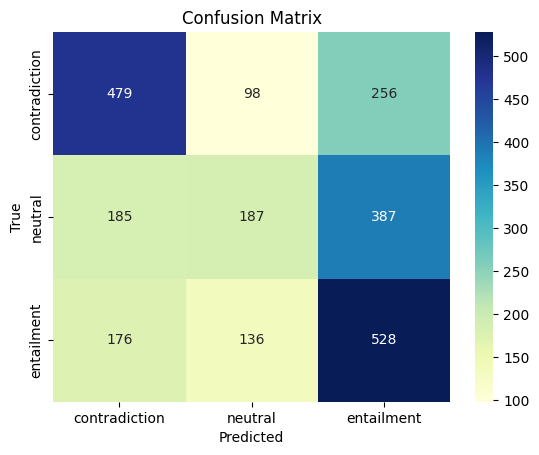


Classification Report for Language: Arabic
               precision    recall  f1-score   support

contradiction       0.52      0.50      0.51        22
      neutral       0.68      0.43      0.53        30
   entailment       0.51      0.72      0.60        29

     accuracy                           0.56        81
    macro avg       0.57      0.55      0.55        81
 weighted avg       0.58      0.56      0.55        81


Classification Report for Language: Bulgarian
               precision    recall  f1-score   support

contradiction       0.57      0.52      0.55        23
      neutral       0.54      0.29      0.38        24
   entailment       0.46      0.73      0.56        22

     accuracy                           0.51        69
    macro avg       0.52      0.51      0.50        69
 weighted avg       0.52      0.51      0.49        69


Classification Report for Language: Chinese
               precision    recall  f1-score   support

contradiction       0.69      0.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sentence_transformers import SentenceTransformer

# Check device availability (TensorFlow automatically uses GPU if available)
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using GPU")
else:
    print("TensorFlow is using CPU")

# 1. Load and Preprocess Data

data_path = '/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/train.csv'
data = pd.read_csv(data_path)
# Invert labels as per your dataset requirement
data['label'] = data['label'].replace([0, 2], [2, 0])
print("Data Shape:", data.shape)
print(data.head())

# 2. Train-Eval Split (Maintain Language Balance)

train_data_list, eval_data_list = [], []
for lang, group in data.groupby('language'):
    train_size = int(0.8 * len(group))
    train_data_list.append(group.iloc[:train_size])
    eval_data_list.append(group.iloc[train_size:])
train_data = pd.concat(train_data_list).reset_index(drop=True)
eval_data = pd.concat(eval_data_list).reset_index(drop=True)

print("Train samples:", len(train_data))
print("Eval samples:", len(eval_data))

# 3. Initialize the Sentence Transformer

embedding_model = SentenceTransformer('sentence-transformers/xlm-r-bert-base-nli-stsb-mean-tokens')


# 4. Create a TensorFlow Dataset
input_dim = 768   # Embedding dimension from the Sentence Transformer
batch_size = 16

def data_generator(dataframe):
    # Generator function that yields (embedding, label) tuples.
    for _, row in dataframe.iterrows():
        # Combine premise and hypothesis with a separator
        text = row['premise'] + " [SEP] " + row['hypothesis']
        # Obtain the embedding as a numpy array (convert_to_tensor=False to avoid PyTorch tensors)
        embedding = embedding_model.encode(text, convert_to_tensor=False)
        embedding = np.array(embedding, dtype=np.float32)
        label = int(row['label'])
        yield embedding, label

# Create tf.data.Dataset objects for training and evaluation.
train_dataset_tf = tf.data.Dataset.from_generator(
    lambda: data_generator(train_data),
    output_types=(tf.float32, tf.int64),
    output_shapes=((input_dim,), ())
)
train_dataset_tf = train_dataset_tf.shuffle(buffer_size=len(train_data)).batch(batch_size)

eval_dataset_tf = tf.data.Dataset.from_generator(
    lambda: data_generator(eval_data),
    output_types=(tf.float32, tf.int64),
    output_shapes=((input_dim,), ())
)
eval_dataset_tf = eval_dataset_tf.batch(batch_size)

# 5. Define the ANN Classifier Model in TensorFlow

hidden_dim = 256
output_dim = 3  # Three classes: contradiction, neutral, entailment

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_dim, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(hidden_dim // 2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(output_dim)  # Logits layer (no activation)
])
model.summary()


# 6. Compile the Model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


# 7. Training Setup with Model Checkpointing
checkpoint_path = "/content/drive/MyDrive/project/SM Technology Task/best_ann_model_tf.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

num_epochs = 10  # Adjust as needed
history = model.fit(
    train_dataset_tf,
    epochs=num_epochs,
    validation_data=eval_dataset_tf,
    callbacks=[checkpoint_callback]
)


# 8. Load the Best Model and Final Evaluation
best_model = tf.keras.models.load_model(checkpoint_path)

eval_preds = []
eval_labels = []

for embeddings, labels in eval_dataset_tf:
    logits = best_model(embeddings, training=False)
    preds = tf.argmax(logits, axis=1).numpy()
    eval_preds.extend(preds)
    eval_labels.extend(labels.numpy())

print("General Classification Report:")
print(classification_report(eval_labels, eval_preds, target_names=['contradiction', 'neutral', 'entailment']))

# Plot Confusion Matrix
cm = confusion_matrix(eval_labels, eval_preds)
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt='g',
            xticklabels=['contradiction', 'neutral', 'entailment'],
            yticklabels=['contradiction', 'neutral', 'entailment'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 9. Per-Language Evaluation on the Eval Set
for lang, group in eval_data.groupby('language'):
    dataset_lang = tf.data.Dataset.from_generator(
        lambda: data_generator(group),
        output_types=(tf.float32, tf.int64),
        output_shapes=((input_dim,), ())
    ).batch(16)

    lang_preds = []
    lang_labels = []
    for embeddings, labels in dataset_lang:
        logits = best_model(embeddings, training=False)
        preds = tf.argmax(logits, axis=1).numpy()
        lang_preds.extend(preds)
        lang_labels.extend(labels.numpy())

    print(f"\nClassification Report for Language: {lang}")
    print(classification_report(lang_labels, lang_preds, target_names=['contradiction', 'neutral', 'entailment']))


# 10. Direct Evaluation on a Few Examples
direct_eval_df = data.iloc[0:50]
label_map = {0: 'contradiction', 1: 'neutral', 2: 'entailment'}

print("\nDirect Evaluation on Sample Inputs:\n")
for idx, row in direct_eval_df.iterrows():
    text = row['premise'] + " [SEP] " + row['hypothesis']
    embedding = embedding_model.encode(text, convert_to_tensor=False)
    embedding = np.array(embedding, dtype=np.float32)
    # Expand dimensions to create a batch of one
    embedding_tf = tf.expand_dims(embedding, axis=0)
    logits = best_model(embedding_tf, training=False)
    pred = tf.argmax(logits, axis=1).numpy()[0]
    print(f"Input {idx+1} | Language: {row['language']}")
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Prediction: {label_map[pred]}")
    print("-" * 80)


# **Train LSTM model for sequence-based learning**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load and Prepare Data
df2 = pd.read_csv('/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/train.csv')  # Load your dataset

# Convert embeddings from strings to numpy arrays
df2['premise_w2v'] = df['premise_w2v'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
df2['hypothesis_w2v'] = df['hypothesis_w2v'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# 2. Create Input Matrix
premise_emb = np.stack(df['premise_w2v'].values)
hypothesis_emb = np.stack(df['hypothesis_w2v'].values)
X = np.concatenate([premise_emb, hypothesis_emb], axis=1)
y = df2['label'].values

# 3. Train-Test Split (Stratified for Class Balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Build Multilingual ANN Architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),

    Dense(3, activation='softmax')  # 3 output classes
])

# 5. Compile with Multilingual Considerations
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# 8. Optional: Language-Specific Analysis
for lang in df['language'].unique():
    lang_mask = df['language'] == lang
    lang_X = X[lang_mask]
    lang_y = y[lang_mask]
    lang_loss, lang_acc = model.evaluate(lang_X, lang_y, verbose=0)
    print(f"{lang} Accuracy: {lang_acc*100:.2f}%")

<ipython-input-67-e9509b716490>:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df2['premise_w2v'] = df['premise_w2v'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
<ipython-input-67-e9509b716490>:13: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df2['hypothesis_w2v'] = df['hypothesis_w2v'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3265 - loss: 1.4762 - val_accuracy: 0.3351 - val_loss: 1.1072
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3443 - loss: 1.2390 - val_accuracy: 0.3464 - val_loss: 1.1120
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3421 - loss: 1.1782 - val_accuracy: 0.3680 - val_loss: 1.0957
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3465 - loss: 1.1516 - val_accuracy: 0.3588 - val_loss: 1.0964
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3428 - loss: 1.1374 - val_accuracy: 0.3371 - val_loss: 1.1055
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3465 - loss: 1.1293 - val_accuracy: 0.3670 - val_loss: 1.1039
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3523 - loss: 1.1275 - val_accuracy: 0.3505 - val_loss: 1.0988
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3581 - loss: 1.1153 - val_accuracy:

## **Alternative Way**

In [ ]:
import nltk
# ... (rest of your imports)

# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ... (rest of your code)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class SentenceRelationshipClassifier:
    def __init__(self, max_features=10000, embedding_dim=100, max_length=100):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.max_features = max_features
        self.embedding_dim = embedding_dim
        self.max_length = max_length
        self.tokenizer = Tokenizer(num_words=max_features)
        self.model = None

    def preprocess_text(self, text):
        """
        Preprocess text by lowercasing, removing punctuation, stopwords and lemmatizing
        """
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = re.sub(f'[{string.punctuation}]', ' ', text)

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords and lemmatize
        cleaned_tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                          if token not in self.stop_words and token.isalpha()]

        # Join tokens back into a string
        cleaned_text = ' '.join(cleaned_tokens)

        return cleaned_text

    def prepare_data(self, df):
        """
        Prepare the data for model training
        """
        # Preprocess premise and hypothesis
        df['premise_processed'] = df['premise'].apply(self.preprocess_text)
        df['hypothesis_processed'] = df['hypothesis'].apply(self.preprocess_text)

        # Create feature text by combining premise and hypothesis
        df['combined'] = df['premise_processed'] + ' [SEP] ' + df['hypothesis_processed']

        # Fit tokenizer on combined text
        self.tokenizer.fit_on_texts(df['combined'])

        # Create sequences
        sequences = self.tokenizer.texts_to_sequences(df['combined'])

        # Pad sequences
        X = pad_sequences(sequences, maxlen=self.max_length)

        # Remap labels if needed (2=Contradiction, 1=Neutral, 0=Entailment)
        label_mapping = {'contradiction': 2, 'neutral': 1, 'entailment': 0}
        if df['label'].dtype == object:
            df['label'] = df['label'].map(label_mapping)

        return X, df['label'].values

    def build_model(self):
        """
        Build a Bidirectional LSTM model
        """
        model = Sequential()
        model.add(Embedding(self.max_features, self.embedding_dim, input_length=self.max_length))
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
        model.add(Bidirectional(LSTM(32)))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(3, activation='softmax'))  # 3 classes: contradiction, neutral, entailment

        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        self.model = model
        return model

    def train(self, df, epochs=10, batch_size=32, validation_split=0.2):
        """
        Train the model
        """
        X, y = self.prepare_data(df)

        if self.model is None:
            self.build_model()

        history = self.model.fit(
            X, y,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            verbose=1
        )

        return history

    def predict(self, premise, hypothesis):
        """
        Make predictions for new sentence pairs
        """
        premise_processed = self.preprocess_text(premise)
        hypothesis_processed = self.preprocess_text(hypothesis)
        combined = premise_processed + ' [SEP] ' + hypothesis_processed

        # Convert to sequence and pad
        sequence = self.tokenizer.texts_to_sequences([combined])
        padded = pad_sequences(sequence, maxlen=self.max_length)

        # Get prediction probabilities
        prediction = self.model.predict(padded)

        # Get class
        predicted_class = np.argmax(prediction, axis=1)[0]

        # Map back to label
        label_map = {0: 'entailment', 1: 'neutral', 2: 'contradiction'}
        return label_map[predicted_class], prediction[0][predicted_class]

    def evaluate(self, df):
        """
        Evaluate model on test data
        """
        X, y = self.prepare_data(df)
        loss, accuracy = self.model.evaluate(X, y, verbose=0)

        # Get predictions
        predictions = self.model.predict(X)
        y_pred = np.argmax(predictions, axis=1)

        # Generate classification report
        label_map = {0: 'entailment', 1: 'neutral', 2: 'contradiction'}
        target_names = [label_map[i] for i in range(3)]

        report = classification_report(y, y_pred, target_names=target_names)

        return {
            'accuracy': accuracy,
            'classification_report': report,
            'loss': loss
        }

    def save_model(self, filepath):
        """
        Save the model to disk
        """
        self.model.save(filepath)

    def load_model(self, filepath):
        """
        Load a saved model
        """
        self.model = tf.keras.models.load_model(filepath)

# Alternative model using sklearn's MLPClassifier
class SklearnSentenceClassifier:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

        # TFIDF vectorizers for premise and hypothesis
        self.premise_vectorizer = TfidfVectorizer(max_features=5000)
        self.hypothesis_vectorizer = TfidfVectorizer(max_features=5000)

        # Neural network classifier
        self.model = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            batch_size=64,
            learning_rate='adaptive',
            max_iter=200,
            early_stopping=True,
            verbose=1
        )

    def preprocess_text(self, text):
        """
        Preprocess text by lowercasing, removing punctuation, stopwords and lemmatizing
        """
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = re.sub(f'[{string.punctuation}]', ' ', text)

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords and lemmatize
        cleaned_tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                          if token not in self.stop_words and token.isalpha()]

        # Join tokens back into a string
        cleaned_text = ' '.join(cleaned_tokens)

        return cleaned_text

    def prepare_data(self, df):
        """
        Prepare data for the sklearn model
        """
        # Preprocess premise and hypothesis
        df['premise_processed'] = df['premise'].apply(self.preprocess_text)
        df['hypothesis_processed'] = df['hypothesis'].apply(self.preprocess_text)

        # Fit and transform premise and hypothesis with TF-IDF
        premise_features = self.premise_vectorizer.fit_transform(df['premise_processed'])
        hypothesis_features = self.hypothesis_vectorizer.fit_transform(df['hypothesis_processed'])

        # Combine features
        X = np.hstack((premise_features.toarray(), hypothesis_features.toarray()))

        # Remap labels if needed (2=Contradiction, 1=Neutral, 0=Entailment)
        label_mapping = {'contradiction': 2, 'neutral': 1, 'entailment': 0}
        if df['label'].dtype == object:
            df['label'] = df['label'].map(label_mapping)

        return X, df['label'].values

    def train(self, df):
        """
        Train the model
        """
        X, y = self.prepare_data(df)
        self.model.fit(X, y)
        return self.model

    def predict(self, premise, hypothesis):
        """
        Make predictions for new sentence pairs
        """
        premise_processed = self.preprocess_text(premise)
        hypothesis_processed = self.preprocess_text(hypothesis)

        # Transform with fitted vectorizers
        premise_vector = self.premise_vectorizer.transform([premise_processed])
        hypothesis_vector = self.hypothesis_vectorizer.transform([hypothesis_processed])

        # Combine features
        X = np.hstack((premise_vector.toarray(), hypothesis_vector.toarray()))

        # Predict
        prediction = self.model.predict(X)[0]

        # Map back to label
        label_map = {0: 'entailment', 1: 'neutral', 2: 'contradiction'}
        return label_map[prediction], self.model.predict_proba(X)[0][prediction]

    def evaluate(self, df):
        """
        Evaluate model on test data
        """
        X, y = self.prepare_data(df)
        y_pred = self.model.predict(X)

        # Calculate accuracy
        accuracy = accuracy_score(y, y_pred)

        # Generate classification report
        label_map = {0: 'entailment', 1: 'neutral', 2: 'contradiction'}
        target_names = [label_map[i] for i in range(3)]

        report = classification_report(y, y_pred, target_names=target_names)

        return {
            'accuracy': accuracy,
            'classification_report': report
        }

# Main execution function
def main():
    # Load dataset
    df = pd.read_csv('/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/train.csv')

    # Map numeric labels to named categories for better readability
    df['label_name'] = df['label'].map({
        2: 'contradiction',
        1: 'neutral',
        0: 'entailment'
    })

    print(f"Dataset shape: {df.shape}")
    print(f"Label distribution: {df['label'].value_counts()}")

    # Split the data
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
    print(f"Training set size: {train_df.shape}")
    print(f"Test set size: {test_df.shape}")

    # Create and train the Keras model
    print("\nTraining the Deep Learning model...")
    classifier = SentenceRelationshipClassifier(max_features=10000, embedding_dim=100, max_length=100)
    history = classifier.train(
        train_df,
        epochs=5,  # Reduced for faster execution, increase for better results
        batch_size=32,
        validation_split=0.1
    )

    # Evaluate the model
    print("\nEvaluating the Deep Learning model...")
    eval_results = classifier.evaluate(test_df)
    print(f"Accuracy: {eval_results['accuracy']:.4f}")
    print(f"Classification Report:\n{eval_results['classification_report']}")

    # Save the model
    classifier.save_model('sentence_relationship_model.h5')
    print("Deep Learning model saved as 'sentence_relationship_model.h5'")

    # Optional: Train the sklearn model as well for comparison
    print("\nTraining the Sklearn MLP model for comparison...")
    sk_classifier = SklearnSentenceClassifier()
    sk_classifier.train(train_df)

    # Evaluate the sklearn model
    print("\nEvaluating the Sklearn model...")
    sk_eval_results = sk_classifier.evaluate(test_df)
    print(f"Accuracy: {sk_eval_results['accuracy']:.4f}")
    print(f"Classification Report:\n{sk_eval_results['classification_report']}")

    # Example of using the model for prediction
    print("\nExample predictions:")
    examples = [
        {
            'premise': 'The cat is on the mat.',
            'hypothesis': 'The cat is sitting on the floor.',
            'expected': 'neutral'
        },
        {
            'premise': 'The dog is chasing the squirrel.',
            'hypothesis': 'The squirrel is running away from the dog.',
            'expected': 'entailment'
        },
        {
            'premise': 'It is raining outside.',
            'hypothesis': 'The weather is sunny and clear.',
            'expected': 'contradiction'
        }
    ]

    for example in examples:
        label, confidence = classifier.predict(example['premise'], example['hypothesis'])
        print(f"Premise: {example['premise']}")
        print(f"Hypothesis: {example['hypothesis']}")
        print(f"Expected: {example['expected']}")
        print(f"Predicted: {label} (confidence: {confidence:.4f})")
        print("---")

# Example of how to run the code
if __name__ == "__main__":
    main()

# Example of how to use the model with multilingual data
def process_multilingual_data():
    # Load dataset with language information
    df = pd.read_csv('train.csv')

    # Group by language
    language_groups = df.groupby('language')

    for language, group in language_groups:
        print(f"\nProcessing {language} data ({len(group)} samples)")

        # If sufficient samples, create a language-specific model
        if len(group) >= 100:
            train_df, test_df = train_test_split(group, test_size=0.2, random_state=42)

            classifier = SentenceRelationshipClassifier(
                max_features=5000,  # Smaller vocabulary for language-specific model
                embedding_dim=100,
                max_length=100
            )

            # Train model with fewer epochs for language-specific data
            classifier.train(
                train_df,
                epochs=3,
                batch_size=16,
                validation_split=0.1
            )

            # Evaluate
            eval_results = classifier.evaluate(test_df)
            print(f"{language} model accuracy: {eval_results['accuracy']:.4f}")

            # Save language-specific model
            classifier.save_model(f'sentence_relationship_model_{language.lower()}.h5')
        else:
            print(f"Not enough samples for a dedicated {language} model.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (12120, 7)
Label distribution: label
0    4176
2    4064
1    3880
Name: count, dtype: int64
Training set size: (9696, 7)
Test set size: (2424, 7)

Training the Deep Learning model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


273/273 ━━━━━━━━━━━━━━━━━━━━ 78s 244ms/step - accuracy: 0.3432 - loss: 1.0992 - val_accuracy: 0.3443 - val_loss: 1.0994
Epoch 2/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 66s 242ms/step - accuracy: 0.3952 - loss: 1.0853 - val_accuracy: 0.3732 - val_loss: 1.1112
Epoch 3/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 78s 228ms/step - accuracy: 0.6038 - loss: 0.8821 - val_accuracy: 0.3309 - val_loss: 1.2307
Epoch 4/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 82s 230ms/step - accuracy: 0.7577 - loss: 0.6076 - val_accuracy: 0.3216 - val_loss: 1.7286
Epoch 5/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 81s 227ms/step - accuracy: 0.8323 - loss: 0.3958 - val_accuracy: 0.3196 - val_loss: 2.2787

Evaluating the Deep Learning model...
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step


Accuracy: 0.3370
Classification Report:
               precision    recall  f1-score   support

   entailment       0.34      0.41      0.37       835
      neutral       0.34      0.26      0.29       776
contradiction       0.33      0.34      0.33       813

     accuracy                           0.34      2424
    macro avg       0.34      0.34      0.33      2424
 weighted avg       0.34      0.34      0.33      2424

Deep Learning model saved as 'sentence_relationship_model.h5'

Training the Sklearn MLP model for comparison...
Iteration 1, loss = 1.10142815
Validation score: 0.336082
Iteration 2, loss = 1.02442047
Validation score: 0.318557
Iteration 3, loss = 0.75924553
Validation score: 0.309278
Iteration 4, loss = 0.48747603
Validation score: 0.306186
Iteration 5, loss = 0.31801185
Validation score: 0.307216
Iteration 6, loss = 0.23153759
Validation score: 0.315464
Iteration 7, loss = 0.18451362
Validation score: 0.319588
Iteration 8, loss = 0.15764423
Validation score: 0.308

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Premise: The cat is on the mat.
Hypothesis: The cat is sitting on the floor.
Expected: neutral
Predicted: contradiction (confidence: 0.5436)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Premise: The dog is chasing the squirrel.
Hypothesis: The squirrel is running away from the dog.
Expected: entailment
Predicted: entailment (confidence: 0.6291)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Premise: It is raining outside.
Hypothesis: The weather is sunny and clear.
Expected: contradiction
Predicted: entailment (confidence: 0.4699)
---


# **Transformer-Based Models: XLM-R for contextual understanding.**

## **Environment Setup and Dependency Installation**

In [ ]:
!pip install transformers

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader, Sampler
from collections import defaultdict
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
# Load Data
data = pd.read_csv('/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/train.csv')
data['language'].unique()

array(['English', 'French', 'Thai', 'Turkish', 'Urdu', 'Russian',
       'Bulgarian', 'German', 'Arabic', 'Chinese', 'Hindi', 'Swahili',
       'Vietnamese', 'Spanish', 'Greek'], dtype=object)

In [ ]:
data['label'] = data['label'].replace({0: 2, 2: 0})

## **Pretrained Model Initialization**

In [ ]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Model and Tokenizer
MODEL_NAME = 'joeddav/xlm-roberta-large-xnli'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.config.hidden_dropout_prob = 0.3  # Enable dropout
model.to(dev)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, ou

In [ ]:
# Calculate class weights for weighted loss
label_counts = data['label'].value_counts().sort_index()
class_weights = torch.tensor(
    [len(data) / (3 * count) for count in label_counts.values],
    dtype=torch.float32
).to(dev)
print("Class weights:", class_weights)

Class weights: tensor([0.9941, 1.0412, 0.9674])


In [ ]:
# Train-Eval Split with stratification by language and label
data['language'] = data['language'].astype(str)

## **Stratified Train-Test Split by Language and Label**

In [ ]:
train_data, eval_data = [], []
for lang, group in data.groupby('language'):
    # For low-resource languages (less than 500 examples), use 90% for training
    # For high-resource languages, use 80% for training
    if len(group) < 500:
        train_size = int(0.9 * len(group))
    else:
        train_size = int(0.8 * len(group))

    # Further stratify by label within each language
    lang_train, lang_eval = [], []
    for label, label_group in group.groupby('label'):
        label_train_size = int(train_size * len(label_group) / len(group))
        lang_train.append(label_group.iloc[:label_train_size])
        lang_eval.append(label_group.iloc[label_train_size:])

    train_data.append(pd.concat(lang_train))
    eval_data.append(pd.concat(lang_eval))

train_data = pd.concat(train_data).reset_index(drop=True)
eval_data = pd.concat(eval_data).reset_index(drop=True)

In [ ]:
# Analyze and print language distribution
lang_train_dist = train_data['language'].value_counts().sort_index()
lang_eval_dist = eval_data['language'].value_counts().sort_index()
print("Training language distribution:", lang_train_dist)
print("Eval language distribution:", lang_eval_dist)

Training language distribution: language
Arabic         358
Bulgarian      305
Chinese        368
English       5494
French         350
German         313
Greek          333
Hindi          335
Russian        336
Spanish        328
Swahili        344
Thai           332
Turkish        313
Urdu           340
Vietnamese     340
Name: count, dtype: int64
Eval language distribution: language
Arabic          43
Bulgarian       37
Chinese         43
English       1376
French          40
German          38
Greek           39
Hindi           39
Russian         40
Spanish         38
Swahili         41
Thai            39
Turkish         38
Urdu            41
Vietnamese      39
Name: count, dtype: int64


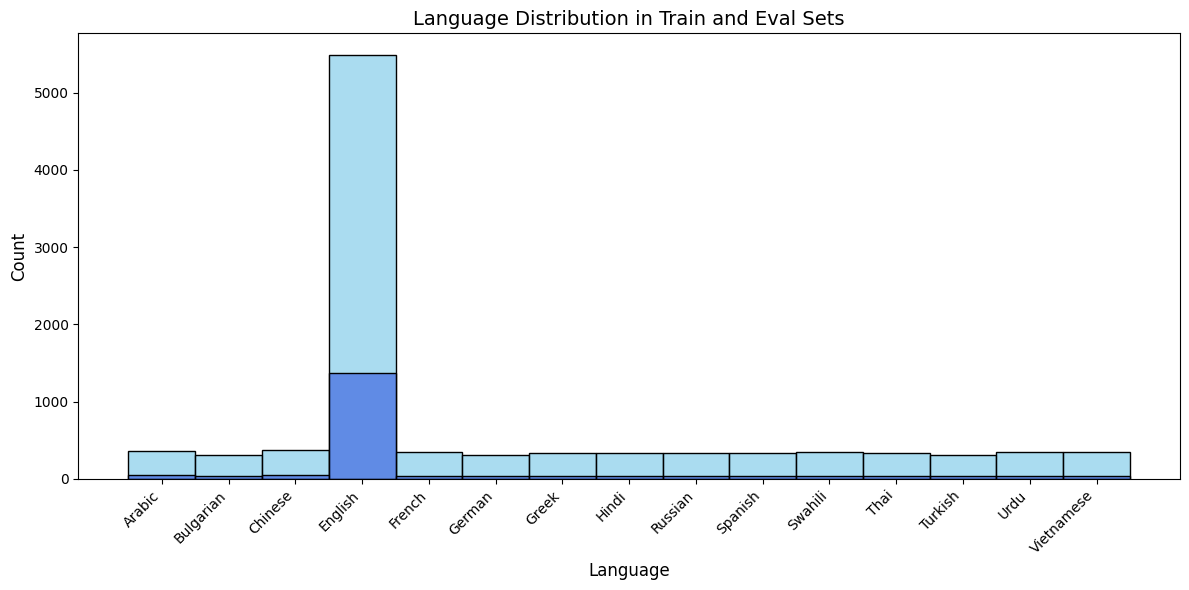

In [ ]:
# Visualize Data Distribution with histplot
plt.figure(figsize=(12, 6))
sns.histplot(train_data['language'], label='Train', color='skyblue', alpha=0.7)
sns.histplot(eval_data['language'], label='Eval', color='royalblue', alpha=0.7)
plt.title('Language Distribution in Train and Eval Sets', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Custom NLI Dataset Class for Preprocessing and Label Mapping**

In [ ]:
# Dataset Class
class NLI_Dataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Create language and label mappings for the sampler
        self.language_indices = defaultdict(list)
        self.label_indices = defaultdict(list)

        for idx, row in self.data.iterrows():
            self.language_indices[row['language']].append(idx)
            self.label_indices[row['label']].append(idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        # Using tokenizer more effectively with special tokens
        tokens = self.tokenizer(
            row['premise'],
            row['hypothesis'],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {key: val.squeeze() for key, val in tokens.items()}, torch.tensor(row['label'])

## **Custom Fixed Language Sampler for Balanced Multilingual Batch Sampling**

In [ ]:
class FixedLanguageSampler(Sampler):
    def __init__(self, dataset, batch_size=32, langs_per_batch=5):
        self.dataset = dataset
        self.batch_size = batch_size
        self.langs_per_batch = langs_per_batch
        self.languages = list(dataset.language_indices.keys())
        self.num_batches = len(dataset) // batch_size

    def __iter__(self):
        for _ in range(self.num_batches):
            langs = np.random.choice(self.languages, self.langs_per_batch, replace=False)
            batch = []
            samples_per_lang = self.batch_size // len(langs)
            remainder = self.batch_size % len(langs)

            for i, lang in enumerate(langs):
                n = samples_per_lang + (1 if i < remainder else 0)
                indices = self.dataset.language_indices[lang]
                if len(indices) < n:
                    selected = np.random.choice(indices, n, replace=True)
                else:
                    selected = np.random.choice(indices, n, replace=False)
                batch.extend(selected)
            yield batch

    def __len__(self):
        return self.num_batches  # Correct: number of batches

In [ ]:
# Create Datasets
train_dataset = NLI_Dataset(train_data, tokenizer, max_length=150)  # Increased max length
eval_dataset = NLI_Dataset(eval_data, tokenizer, max_length=150)

# Create DataLoaders with balanced sampling
train_sampler = FixedLanguageSampler(train_dataset, batch_size=24, langs_per_batch=5)
train_loader = DataLoader(train_dataset, batch_sampler=train_sampler)
eval_loader = DataLoader(eval_dataset, batch_size=32, shuffle=False)

In [ ]:
# Training Setup with weighted loss
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)  # Adjusted learning rate and weight decay

num_epochs = 3  # Increased epochs as requested
total_steps = len(train_loader) * num_epochs
num_warmup_steps = int(total_steps * 0.1)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=total_steps
)

best_acc = 0.0

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## **Training Loop with Language-specific Evaluation and Model Checkpointing**

In [ ]:
# Training Loop with language-specific accuracy tracking
model.train()
for epoch in range(num_epochs):
    total_loss, correct, total = 0, 0, 0

    # Track accuracy by language
    lang_correct = defaultdict(int)
    lang_total = defaultdict(int)

    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        inputs, labels = batch
        inputs = {key: val.to(dev) for key, val in inputs.items()}
        labels = labels.to(dev)

        # Get batch language info for logging
        batch_indices = list(range(batch_idx * train_loader.batch_sampler.batch_size,
                           min((batch_idx + 1) * train_loader.batch_sampler.batch_size, len(train_dataset))))
        batch_languages = [train_data.iloc[idx]['language'] for idx in batch_indices if idx < len(train_data)]

        outputs = model(**inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # Log every 100 batches
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}")

    epoch_loss = total_loss / len(train_loader)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.4f}")

    # Evaluate on each epoch
    model.eval()
    eval_preds, eval_true = [], []
    eval_correct, eval_total = 0, 0
    eval_lang_correct = defaultdict(int)
    eval_lang_total = defaultdict(int)

    with torch.no_grad():
        for batch in eval_loader:
            inputs, labels = batch
            inputs = {key: val.to(dev) for key, val in inputs.items()}
            labels = labels.to(dev)
            outputs = model(**inputs).logits
            preds = outputs.argmax(dim=1)

            eval_preds.extend(preds.cpu().numpy())
            eval_true.extend(labels.cpu().numpy())

            eval_correct += (preds == labels).sum().item()
            eval_total += labels.size(0)

    eval_acc = eval_correct / eval_total
    print(f"Evaluation Accuracy: {eval_acc:.4f}")

    # Save Best Model
    if eval_acc > best_acc:
        best_acc = eval_acc
        model.save_pretrained("/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/best_xlmr")
        tokenizer.save_pretrained("/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/best_xlmr")
        print("Best model saved!")

    # Switch back to training mode
    model.train()

Epoch 1, Batch 0, Loss: 0.1536
Epoch 1, Batch 100, Loss: 0.0044
Epoch 1, Batch 200, Loss: 0.3826
Epoch 1, Batch 300, Loss: 0.0912
Epoch 1, Batch 400, Loss: 0.1864
Epoch 1: Loss = 0.1252, Accuracy = 0.9674
Evaluation Accuracy: 0.8892
Best model saved!
Epoch 2, Batch 0, Loss: 0.3600
Epoch 2, Batch 100, Loss: 0.0034
Epoch 2, Batch 200, Loss: 0.3413
Epoch 2, Batch 300, Loss: 0.0027
Epoch 2, Batch 400, Loss: 0.0006
Epoch 2: Loss = 0.0892, Accuracy = 0.9769
Evaluation Accuracy: 0.9042
Best model saved!
Epoch 3, Batch 0, Loss: 0.0613
Epoch 3, Batch 100, Loss: 0.0002
Epoch 3, Batch 200, Loss: 0.0002
Epoch 3, Batch 300, Loss: 0.0004
Epoch 3, Batch 400, Loss: 0.0002
Epoch 3: Loss = 0.0507, Accuracy = 0.9886
Evaluation Accuracy: 0.9052
Best model saved!


# **Final Model Evaluation and Performance Visualization**

Final Classification Report:
               precision    recall  f1-score   support

contradiction       0.93      0.93      0.93       645
      neutral       0.88      0.87      0.87       614
   entailment       0.91      0.91      0.91       672

     accuracy                           0.91      1931
    macro avg       0.90      0.90      0.90      1931
 weighted avg       0.91      0.91      0.91      1931



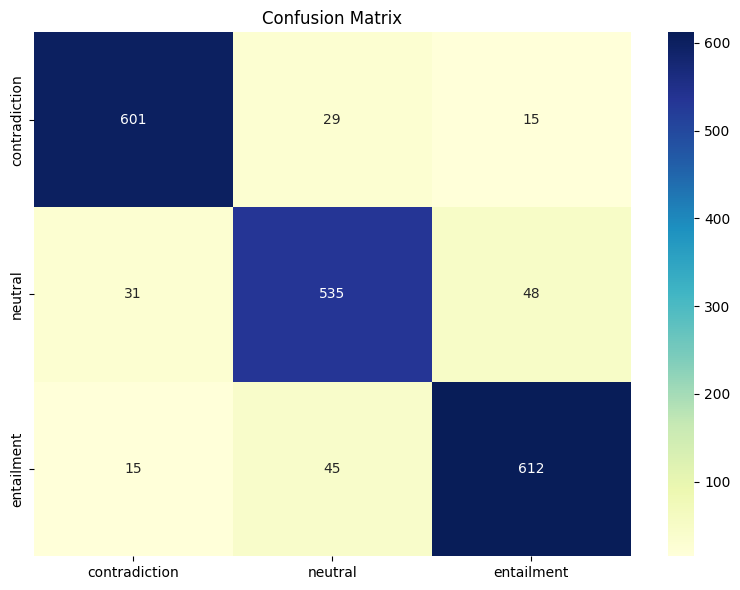

In [ ]:
# Load Best Model for Final Evaluation
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Projects/NLP_Projects/SM Technology Task/best_xlmr")
model.to(dev)
model.eval()

# Final Evaluation
preds, true_labels = [], []
with torch.no_grad():
    for batch in eval_loader:
        inputs, labels = batch
        inputs = {key: val.to(dev) for key, val in inputs.items()}
        labels = labels.to(dev)
        outputs = model(**inputs).logits
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print("Final Classification Report:")
print(classification_report(true_labels, preds, target_names=['contradiction','neutral','entailment']))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt='g',
           xticklabels=['contradiction','neutral','entailment'],
           yticklabels=['contradiction','neutral','entailment'])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()